In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic flow cytometry data for demonstration
n_samples = 1000
data = {
    'FSC-A': np.random.normal(loc=250, scale=50, size=n_samples),  # Cell size
    'SSC-A': np.random.normal(loc=150, scale=40, size=n_samples),  # Cell granularity
    'FL1-A': np.concatenate([np.random.normal(loc=200, scale=50, size=int(0.8 * n_samples)),
                             np.random.normal(loc=800, scale=100, size=int(0.2 * n_samples))]),  # Marker 1
    'FL2-A': np.concatenate([np.random.normal(loc=100, scale=30, size=int(0.8 * n_samples)),
                             np.random.normal(loc=500, scale=120, size=int(0.2 * n_samples))])   # Marker 2
}

# Convert to DataFrame
df = pd.DataFrame(data)


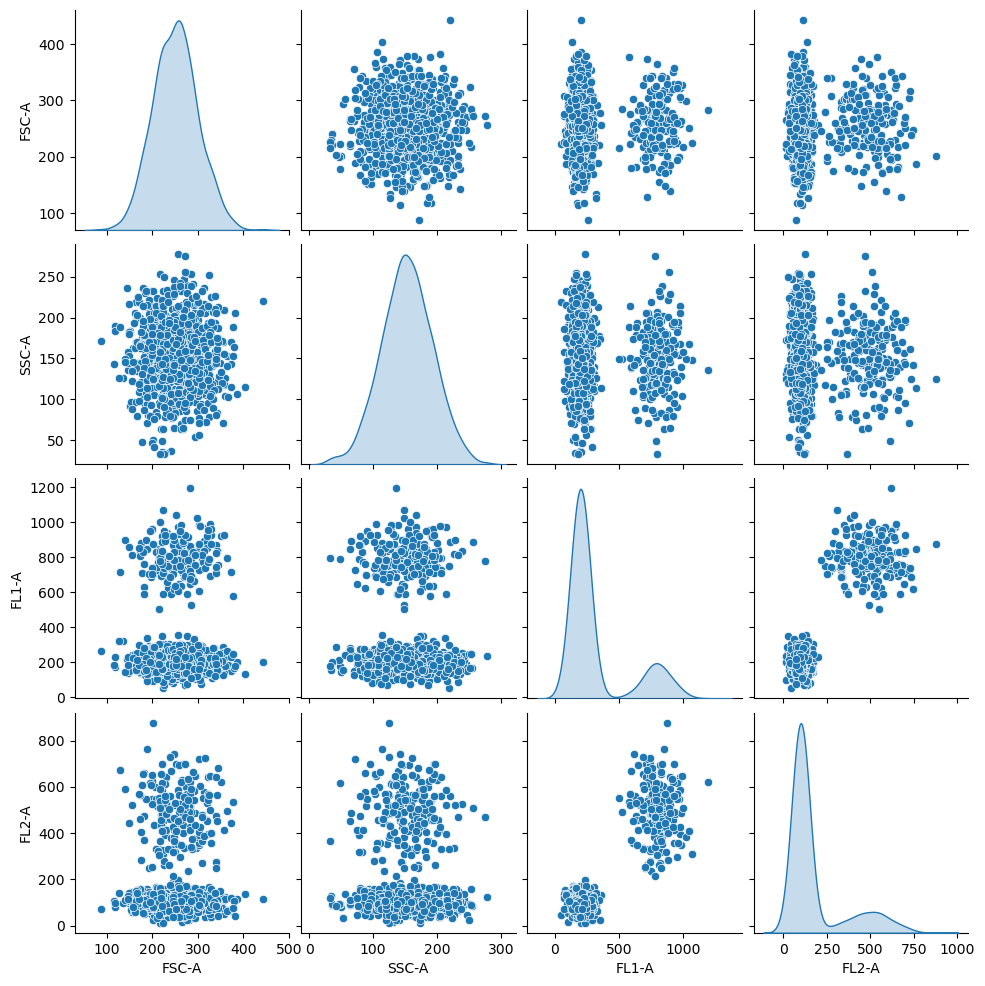

In [2]:
# Visualize with pairplot to understand the data distribution
sns.pairplot(df, diag_kind='kde')
plt.show()


In [3]:
# Lymphocyte gating (example thresholds)
lymphocytes = df[(df['FSC-A'] > 200) & (df['FSC-A'] < 300) & (df['SSC-A'] > 100) & (df['SSC-A'] < 200)]

# Further gating for ALL cells (hypothetical fluorescence thresholds)
all_cells = lymphocytes[(lymphocytes['FL1-A'] > 600) & (lymphocytes['FL2-A'] > 400)]

# Calculate percentage of ALL cells among gated lymphocytes
percentage_all = (len(all_cells) / len(lymphocytes)) * 100
print(f"Percentage of abnormal lymphocytes indicative of ALL: {percentage_all:.2f}%")


Percentage of abnormal lymphocytes indicative of ALL: 14.56%
